<a href="https://colab.research.google.com/github/NguyenTruongV/data_analysis_deep-learning/blob/main/Bai_4.1/Titanic_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

import pandas as pd
def load_data():
      df = pd.read_csv(
        "titanic_disaster.csv",
        header=None,
        engine="python",
        on_bad_lines="skip"
        )
      return df

df = load_data()
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S
6,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,NaN,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S


In [ ]:
Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat
map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked


In [8]:

missing_count = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

missing_df = pd.DataFrame({
    "Số giá trị thiếu": missing_count,
    "Tỷ lệ thiếu (%)": missing_percent
})

missing_df.sort_values(by="Số giá trị thiếu", ascending=False)

,Số giá trị thiếu,Tỷ lệ thiếu (%)
10,687,77.017937
5,177,19.843049
11,2,0.224215
0,0,0.000000
3,0,0.000000
2,0,0.000000
1,0,0.000000
4,0,0.000000
7,0,0.000000
6,0,0.000000


Trực quan hóa dữ liệu thiếu bằng Heatmap

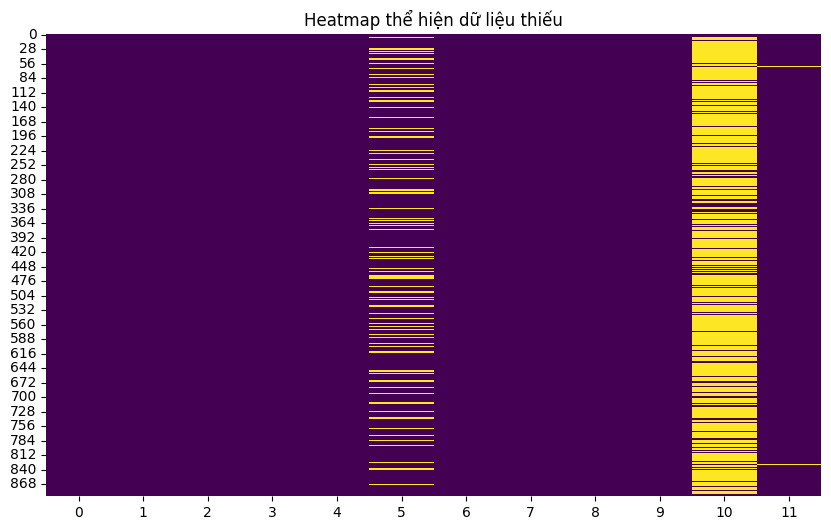

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap thể hiện dữ liệu thiếu")
plt.show()


Biến Age: Bị thiếu khá nhiều (~20%),Các giá trị thiếu phân bố rải rác, không tập trung
Biến Cabin: Thiếu rất nghiêm trọng (~77%),Heatmap cho thấy cả cột gần như trắng
Biến Embarked :Chỉ thiếu rất ít (2–3 dòng),Heatmap chỉ có vài điểm trắng

In [12]:
df.columns = [
    'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
    'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'
]



In [13]:
df['Embarked'].isnull().sum()

np.int64(2)

In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-411043493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [15]:
# Tách Name thành 2 cột
df[['firstName', 'secondName']] = df['Name'].str.split(',', expand=True)

# Loại bỏ cột Name ban đầu
df.drop(columns=['Name'], inplace=True)
df[['firstName','secondName']].head()

,firstName,secondName
0,Name,None
1,Braund,Mr. Owen Harris
2,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
3,Heikkinen,Miss. Laina
4,Futrelle,Mrs. Jacques Heath (Lily May Peel)


Rút gọn dữ liệu cột Sex (male → M, female → F)

In [16]:
df['Sex'] = df['Sex'].replace({'male': 'M', 'female': 'F'})
df['Sex'].value_counts()


,count
Sex,
M,577
F,314
Sex,1


Xử lý dữ liệu thiếu Age

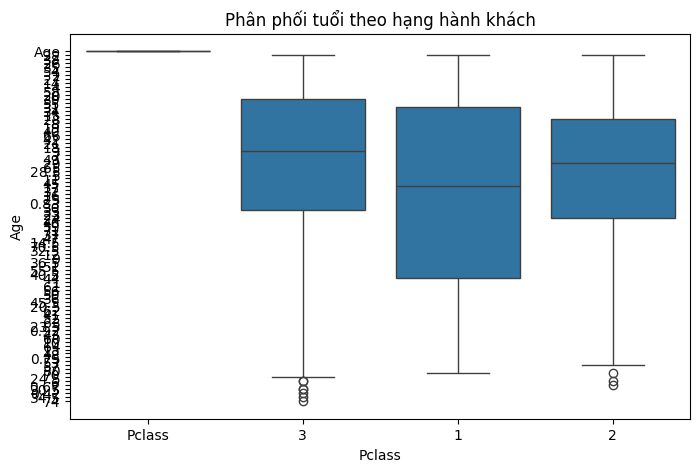

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Phân phối tuổi theo hạng hành khách')
plt.show()

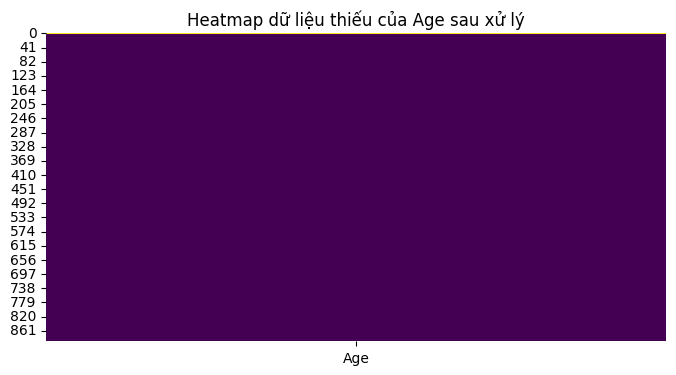

In [19]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df.groupby('Pclass')['Age'].transform(
    lambda x: x.fillna(x.mean())
)

df[['Pclass', 'Age']].head(10)

plt.figure(figsize=(8,4))
sns.heatmap(df[['Age']].isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap dữ liệu thiếu của Age sau xử lý')
plt.show()



In [ ]:
Xây dựng biến Agegroup (thang đo thứ tự)

In [20]:
def age_group(age):
    if age <= 12:
        return 'Kid'
    elif age <= 18:
        return 'Teen'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Older'

df['Agegroup'] = df['Age'].apply(age_group)
df['Agegroup'].value_counts()


,count
Agegroup,
Adult,730
Teen,70
Kid,69
Older,23


Tạo biến danh xưng xã hội (namePrefix)

In [21]:
df['namePrefix'] = df['secondName'].str.extract(r'(Mr|Mrs|Miss|Master)')
df['namePrefix'].value_counts()


,count
namePrefix,
Mr,645
Miss,182
Master,40


Tạo biến familySize

In [25]:
# 1️ Chuyển kiểu dữ liệu trước
df['SibSp'] = pd.to_numeric(df['SibSp'], errors='coerce')
df['Parch'] = pd.to_numeric(df['Parch'], errors='coerce')

# 2️ Sau đó mới tính familySize
df['familySize'] = 1 + df['SibSp'] + df['Parch']

# 3️ Kiểm tra
df[['SibSp', 'Parch', 'familySize']].head()



,SibSp,Parch,familySize
0,NaN,NaN,NaN
1,1.0,0.0,2.0
2,1.0,0.0,2.0
3,0.0,0.0,1.0
4,1.0,0.0,2.0
